In [1]:
### Use pip to install missing libraries
from tensorflow.keras import models, layers, Input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

2023-06-24 09:31:07.312751: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-24 09:31:07.315057: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 09:31:07.383014: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 09:31:07.385963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 09:31:09.809159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
# Load the data. This time we use a build-in function of Keras
train_set = image_dataset_from_directory('/home/ervin/Dokumente/WWU/Modul3/Day_5-20230505/linnaeus/linnaeus/train/', batch_size=16, image_size=(32,32), 
                                         label_mode='categorical', shuffle=True, seed=None)
test_set = image_dataset_from_directory('/home/ervin/Dokumente/WWU/Modul3/Day_5-20230505/linnaeus/linnaeus/test/', batch_size=16, image_size=(32,32), 
                                        label_mode='categorical', shuffle=True, seed=None)

In [ ]:
#train_set??
train_set.element_spec

In [ ]:
# can not access directly, as the images/data is stored in batches
# Need to convert them into iterators

In [ ]:
iterator = iter(test_set)

In [ ]:
print(iterator.output_shapes)
print(iterator.output_types)
print(iterator.output_classes)
print(iterator.element_spec)

In [ ]:
batch = next(iterator)

In [ ]:
# batch tuple as there are also the labels
print(batch[0].shape)   # 16 Images with Resolution 32*32 and 3 for RGB
batch[1].shape          # 16 Images and five Classes/Categories/Labels based on number of Folders

In [ ]:
display(batch[1]) # belongs to folder/class and classes are one-hot-encoded
display(batch[1][0])
batch[0][0]

In [ ]:
img = batch[0][4].numpy().astype(np.int) # Converting tensor (like numpy array) to numpy array, as plt expects int ant not float astype is used
plt.imshow(img, interpolation='nearest')
plt.show()

### Task 3a.

##### 1. Implement the LeNet with ReLU activations
```python
# The model has two Conv, two Pooling, and three Dense layers
# Use softmax with five neurons as output
model = models.Sequential()
model.add(layers.Conv2D(..))
model.add(layers.AveragePooling2D())
...
model.add(layers.Flatten())
...
model.add(layers.Dense(units=5, activation = 'softmax'))
```

See default parameters...<br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

<font size="-1"><code>
tf.keras.layers.Conv2D(<br>
    filters,<br>
    kernel_size,<br>
    strides=(1, 1),<br>
    padding='valid',<br>
    data_format=None,<br>
    dilation_rate=(1, 1),<br>
    groups=1,<br>
    activation=None,<br>
    use_bias=True,<br>
    kernel_initializer='glorot_uniform',<br>
    bias_initializer='zeros',<br>
    kernel_regularizer=None,<br>
    bias_regularizer=None,<br>
    activity_regularizer=None,<br>
    kernel_constraint=None,<br>
    bias_constraint=None,<br>
    **kwargs
)</code>

<b>padding:</b><br>It is used to adjust the spatial dimensions of the output feature map, especially when using a convolutional operation with a kernel/filter that reduces the dimensions.
- Valid Padding: With valid padding, no extra pixels are added around the input image or feature map. The convolution operation is applied only to the valid positions where the kernel and the input overlap completely. This results in a smaller output feature map compared to the input.
- Same Padding: With same padding, additional pixels are added around the input image or feature map to ensure that the spatial dimensions of the output feature map remain the same as the input. The padding values are usually zeros (zero-padding) to maintain the original values at the boundaries.
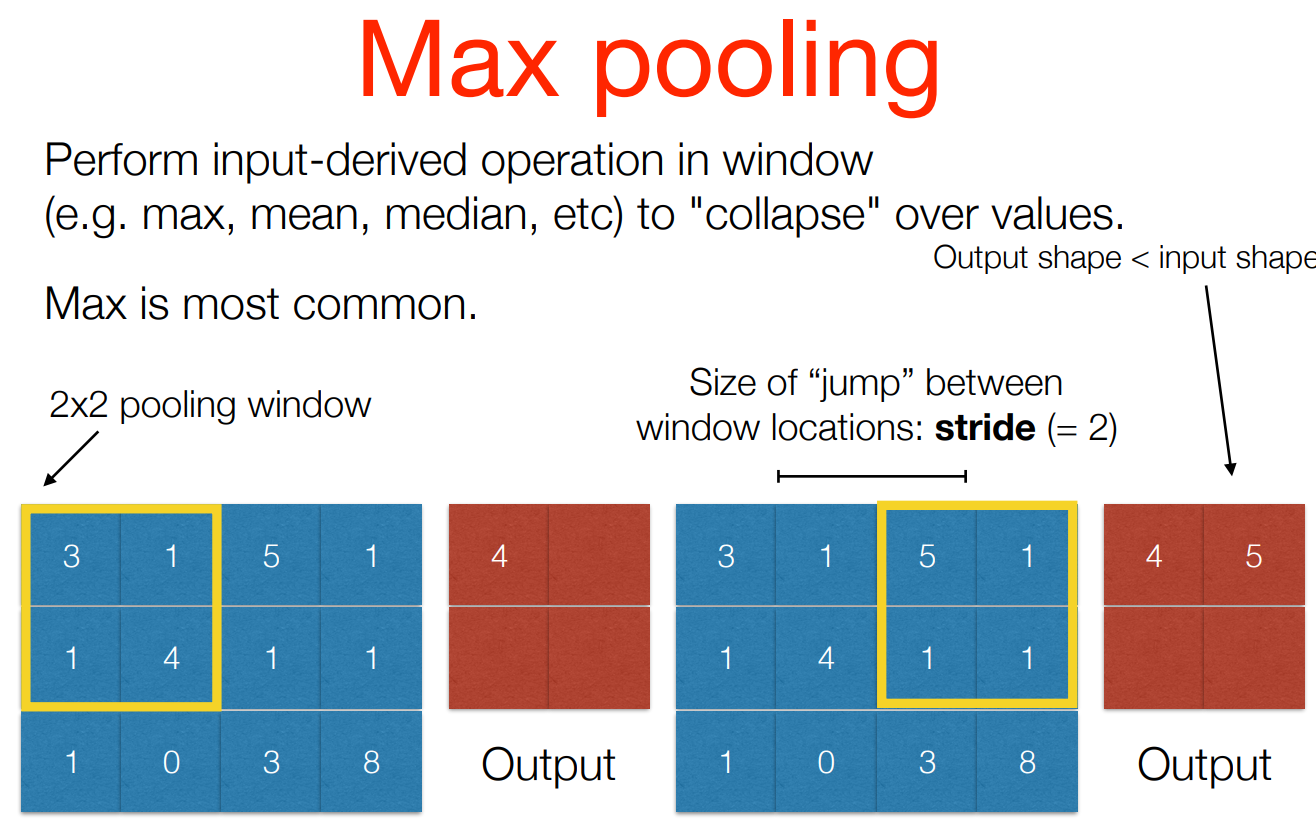</font>
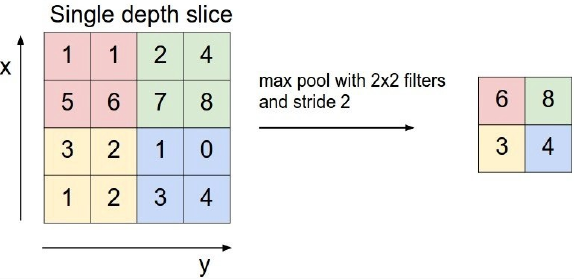
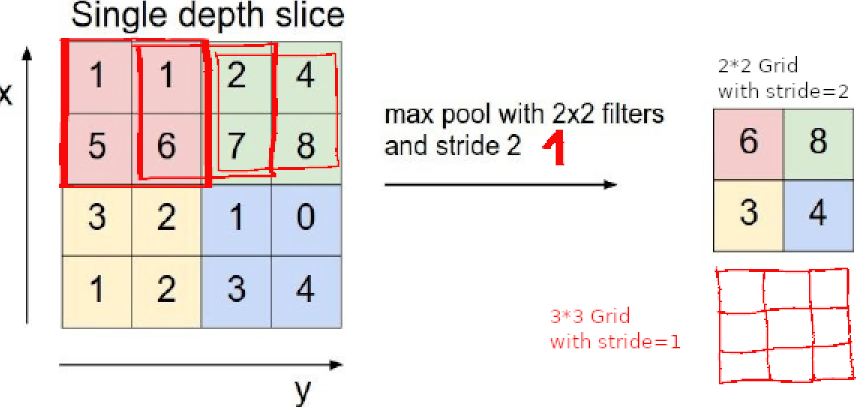

Max pooling output shapes
• Even spatial dims, odd spatial dims, strides, … computing the
max pooling output spatial shape can also be annoying.<br>
Here is the formula (works for either x or y):
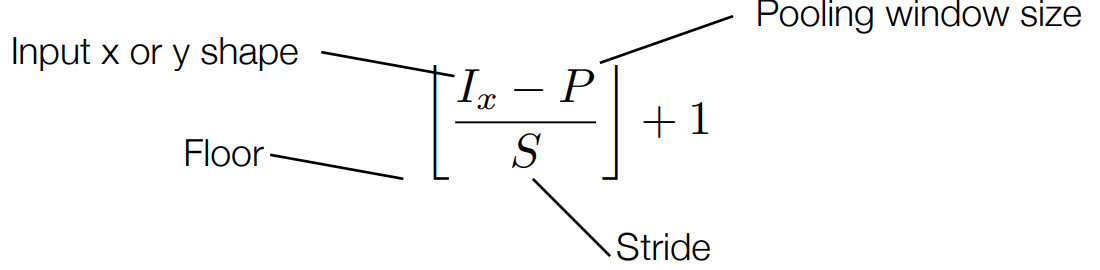

<b>Example:</b>
13x13 image. 2x2 pooling. Stride = 2. floor((13-2)/2)+1 = 6
Input x or y shape
Pooling window size
Stride

<font color=red> <u>Common issue: Result needs to be cast to int!

In [ ]:
# Example: (32x32x3)
I = 9  # pixels in height/width just one value
P = 2   # Filter size (pool_size)
Pad = 0   # Zero padding is in MaxPooling always 0
D = 0   # Depth feature maps
S = 4   # stride

int(((I - P + (2 *Pad)) / S) + 1)

In [3]:
model1 = models.Sequential()
model1.add(Input(shape=(160,160,3)))
model1.add(layers.Conv2D(filters=6, kernel_size=4, strides=3, activation='relu', use_bias=True, padding='same')) # if padding='same' than kernel_size and dilation no effect just divide by strides
model1.add(layers.Conv2D(filters=6, kernel_size=3, strides=2, activation='relu', use_bias=True, padding='valid')) # if padding='same' than kernel_size no effect just divide by strides
model1.add(layers.Conv2D(filters=6, kernel_size=2, strides=1, dilation_rate=3, activation='relu', use_bias=True, padding='same')) # if padding='same' than kernel_size no effect just divide by strides

model1.add(layers.MaxPooling2D(strides=3, pool_size=(2,2))) #pool_size = input_pixel - output_pxel + 1 = 32-28 +1 = 5
model1.add(layers.GlobalAveragePooling2D(keepdims=False))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 54, 54, 6)         294       
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         330       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 6)         150       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 6)          0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 6)                0         
 (GlobalAveragePooling2D)                                        
                                                                 
Total params: 774
Trainable params: 774
Non-trainable 

In [ ]:
model_exam = models.Sequential()
# a)
#model_exam.add(Input(shape=2))
#model_exam.add(layers.Dense(3, activation = "relu", use_bias = True))
#model_exam.add(layers.Dense(2, activation = "relu", use_bias = True ))
#model_exam.add(layers.Dense(1, activation = "sigmoid" , use_bias = False))
#model_exam.summary()

# b)
# #model_exam.add(Input(shape = (32,32,3)))
# #model_exam.add(layers.Conv2D(filters=6, kernel_size=3, strides=1, activation="relu", padding="valid", use_bias=True))
# #model_exam.add(layers.Conv2D(filters=8, kernel_size=3, strides=2, activation="relu", padding="same",  use_bias = True ))
# #model_exam.add(layers.Conv2D(filters=12, kernel_size=2, strides=2, activation="relu", dilation_rate=1, padding="valid", use_bias=True))
# #model_exam.add(layers.GlobalAveragePooling2D()) 
# #model_exam.add(layers.Dense(4, activation="softmax", use_bias = True))

model_exam.add(Input(shape = (128,128,3)))
model_exam.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same", use_bias=True))
#model_exam.add(layers.Conv2D(filters=8, kernel_size=3, strides=2, activation="relu", padding="same",  use_bias = True ))
#model_exam.add(layers.Conv2D(filters=12, kernel_size=2, strides=2, activation="relu", dilation_rate=1, padding="valid", use_bias=True))
#model_exam.add(layers.GlobalAveragePooling2D()) 
#model_exam.add(layers.Dense(4, activation="softmax", use_bias = True))


model_exam.summary()

After GlobalAveragePooling - Feature calc<br>
<b>(Output+1)* neurons<br>
12+1*4=52

In [ ]:
input  size * stride

In [ ]:
def calc_kernel_size(input, output):
    kern_size = input - output + 1
    return f"kernel_size: {kern_size}x{kern_size}"
def calc_subsampling(grid_input, grid_output):
    grid_in = grid_input[0] * grid_input[1]
    grid_out = grid_output[0] * grid_output[1]

    sub_size = (grid_in - output 
    return f"kernel_size: {kern_size}x{kern_size}"

In [ ]:
calc_kernel_size(32, 28)

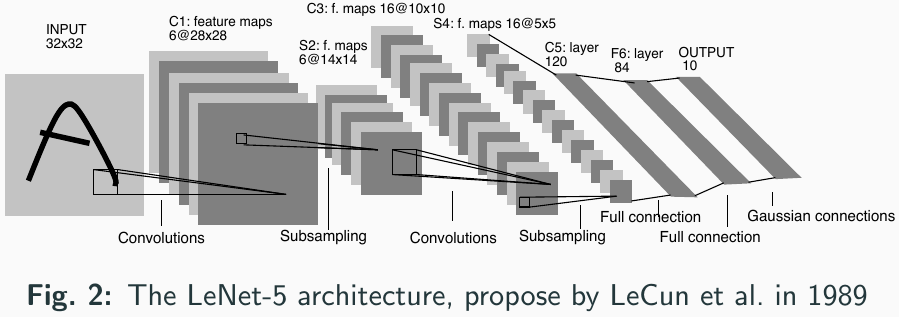

<b>Calculation of parms of Conv2D Layer<br></b>
<code>params = (kernel_size * kernel_size * input_channels + 1) * filters</code>
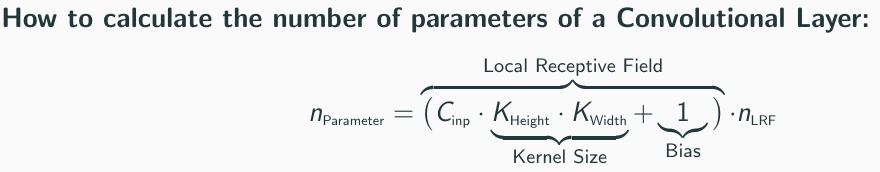
<br><br><b>Calculation of parms of Dense Layer<br></b>
-   BIAS=TRUE
    -   <code>params = (input_units + 1) * output_units</code>
-   BIAS=FALSE
    -   <code>params = (input_units + 0) * output_units</code>
-   <code>params = (input_units * output_units) + num_of_neurons*Bias</code>

<br><br><b>Calculation of feature maps after Pooling<br></b>
    -   <code>Kernel_size = (output_pixel-input_pixel + 1) <br>
    -   feaure map = output_pixel - (kernel_size - 1) </code>


In [ ]:
# LeNet-5 architecture
model = models.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=6,              # C1:feature maps 6@28*28 //see slide 59
                        kernel_size=(5,5) ,     # Difference from Input to Output plus 1 (32 - 28) + 1 = 5. Therefore, the kernel size would be 5x5. 
                        strides=(1,1),          # move of the kernel by step to right (horizontal) and down (vertical). Move kernel 2 pixels horizont & 4 pixels vertically strides = (2,4)
                        padding='valid',        # Adding extra pixels/values around the input image or feature map. Used to adjust spatial dimensions of the output feature map
                        dilation_rate=(1,1),    # spacing between the values in kernel/filter 
                        activation='relu') )

model.add(layers.MaxPool2D(strides=(2,2),    # stride or step size used to slide the pooling window across the input feature map
                              pool_size=(1,1), padding='same')) # size of the pooling window or pool region, (2, 2), the pooling operation will be applied to non-overlapping 2x2 regions in the input feature map, resulting in a downsampled feature map

model.add(layers.Conv2D(filters=16, kernel_size=(5,5) , strides=(1,1), padding='valid', dilation_rate=(1,1), activation='relu')) # as feature maps 16@10x10
model.add(layers.MaxPooling2D(strides=(2,2), pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=5, activation='softmax'))
model.summary()


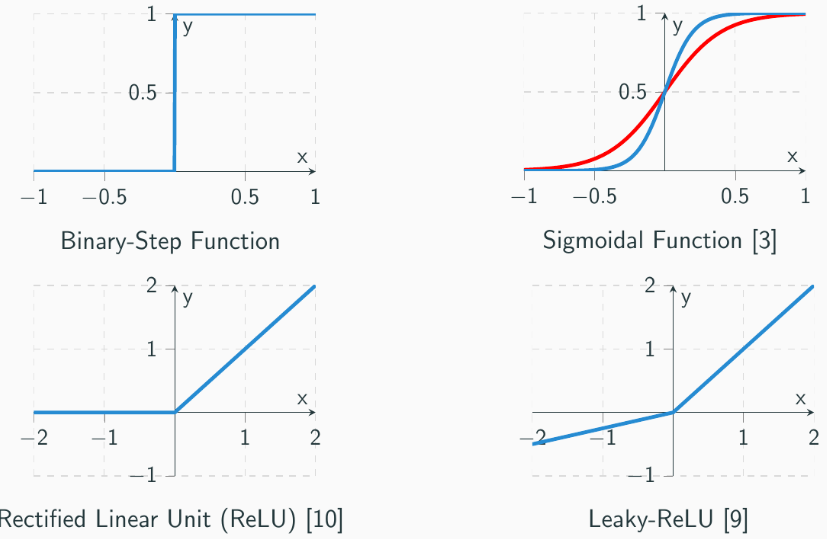
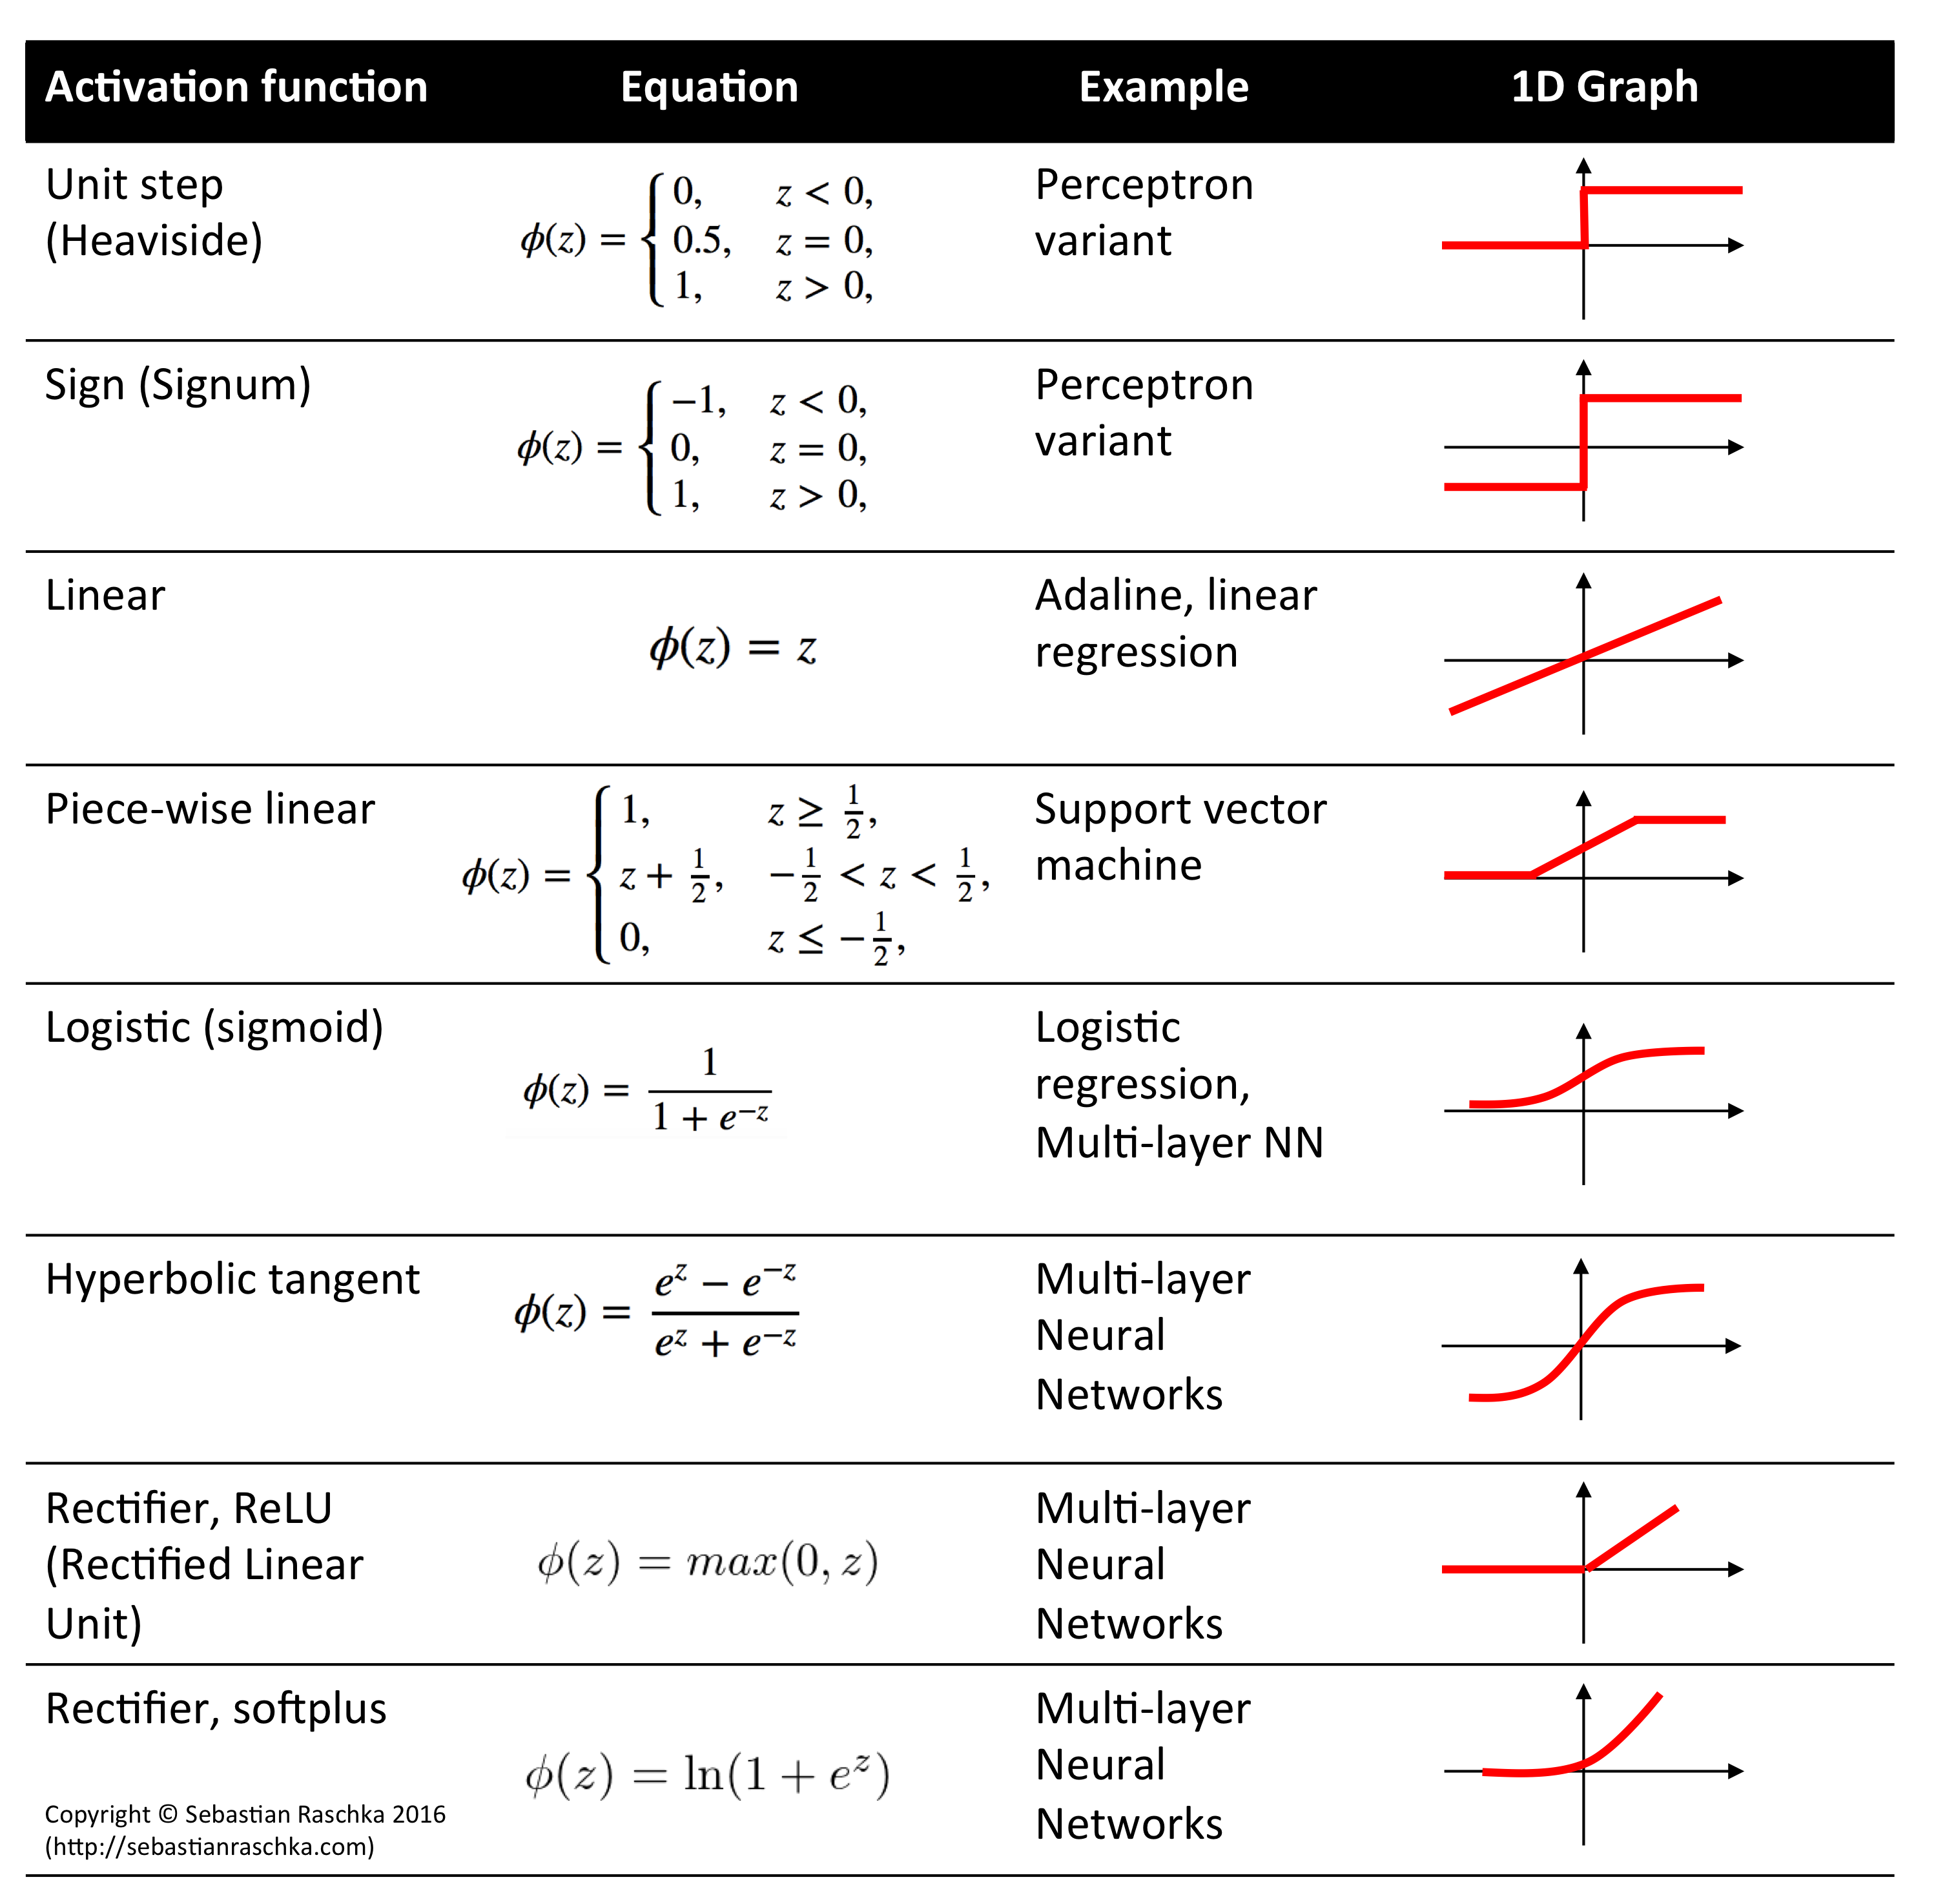

##### 2. Train your model using Categorical Crossentropy as loss and Adam as optimizer
```python
# We use the Categorical Crossentropy as Loss-Function and Adam as the optimizer
model.compile(.., metrics=['accuracy'])
# Train the model by using fit_generator (as we this time have a generator that automatically loads the data)
history = model.fit_generator(generator=train_set, validation_data=test_set, epochs=25, verbose=1)
```

In [ ]:
#model.compile(loss='CategoricalCrossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy']) # CategoricalCorssentropy used when more than one output neuron for classification

In [ ]:
history = model.fit_generator(generator=train_set, validation_data=test_set, epochs=100, verbose=2) # Not the fit insted fit_generator!!!

In [ ]:
acc = list(history.history.keys())[1]
val_acc = list(history.history.keys())[3]
list(history.history.keys())

In [ ]:
x = np.arange(len(history.history['loss']))
plt.figure(figsize=(10,7))
plt.plot(x, history.history['accuracy'], color='red', label=acc.title())
plt.plot(x, history.history['val_accuracy'], color='darkblue', label=val_acc.title())
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


### Task 3b.

##### 1. Try different topologies. How about using Batch-Normalization and Global-Pooling layers?
```python
# Build your own model :-)
# Use softmax with five neurons as output
model2 = models.Sequential()
model.add(Input(shape=(32,32,3)))
model2.add(layers.Conv2D(..))
model2.add(layers.BatchNormalization())
model2.add(layers.ReLU()) 
model2.add(layers.MaxPooling2D(..))
...
model2.add(layers.GlobalAveragePooling2D())
...
model2.add(layers.Dense(units=5, activation = 'softmax'))
```

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation=None, input_shape=(32,32,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.ReLU()) 
model2.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=None))
model2.add(layers.BatchNormalization())
model2.add(layers.ReLU()) 
model2.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=None))
model2.add(layers.BatchNormalization())
model2.add(layers.ReLU()) 

model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(units=5, activation = 'softmax'))

In [ ]:
# With summary you can verify the model
model2.summary()

##### 2. Train your second model using Categorical Crossentropy as loss and Adam as optimizer
```python
# We use the Categorical Crossentropy as Loss-Function and Adam as the optimizer
model2.compile(.., metrics=['accuracy'])
# Train the model by using fit_generator (as we this time have a generator that automatically loads the data)
history2 = model2.fit_generator(generator=train_set, validation_data=test_set, epochs=25, verbose=1)
```

In [ ]:
model2.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy']) # https://keras.io/api/losses/   BinaryCrossentropy
history = model2.fit_generator(generator=train_set, validation_data=test_set, epochs=100, verbose=1) # https://keras.io/api/optimizers/

In [ ]:
acc = list(history.history.keys())[1]
val_acc = list(history.history.keys())[-1]
list[history.history.keys()]

In [ ]:
x = np.arange(len(history.history['loss']))
plt.figure(figsize=(10,7))
plt.plot(x, history.history['accuracy'], color='red', label=acc)
plt.plot(x, history.history['val_accuracy'], color='black', label=val_acc)
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

##### 3. What do you find? Which model works best?
